In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df_up_acc = pd.read_csv(r"Hoch-2025-04-17_13-33-51\Accelerometer.csv")
df_up_acc_uncal = pd.read_csv(r"Hoch-2025-04-17_13-33-51\AccelerometerUncalibrated.csv")

df_up_bar = pd.read_csv(r"Hoch-2025-04-17_13-33-51\Barometer.csv")

df_up_mag = pd.read_csv(r"Hoch-2025-04-17_13-33-51\Magnetometer.csv")
df_up_mag_uncal = pd.read_csv(r"Hoch-2025-04-17_13-33-51\MagnetometerUncalibrated.csv")


In [21]:
df_down_acc = pd.read_csv(r"Runter-2025-04-17_13-33-27\Accelerometer.csv")
df_down_acc_uncal = pd.read_csv(r"Runter-2025-04-17_13-33-27\AccelerometerUncalibrated.csv")

df_down_bar = pd.read_csv(r"Runter-2025-04-17_13-33-27\Barometer.csv")

df_down_mag = pd.read_csv(r"Runter-2025-04-17_13-33-27\Magnetometer.csv")
df_down_mag_uncal = pd.read_csv(r"Runter-2025-04-17_13-33-27\MagnetometerUncalibrated.csv")

In [9]:
df_up_acc.head()

,time,seconds_elapsed,z,y,x
0,1744896831112420000,0.063420,-0.506618,0.261193,0.371905
1,1744896831154262300,0.105262,-0.109735,0.000092,0.231948
2,1744896831171071200,0.122071,-0.025652,-0.060082,0.214884
3,1744896831187874600,0.138875,0.069072,-0.077057,0.151036
4,1744896831204696000,0.155696,0.039619,-0.083047,0.076443


# Add the feature magnitude

In [25]:
def add_magnitude(df):
    df["magnitude"] = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2)
    return df

In [26]:
df_upp_acc = add_magnitude(df_up_acc)

In [27]:
df_upp_acc.head()

,time,seconds_elapsed,z,y,x,magnitude
0,1744896831112420000,0.063420,-0.506618,0.261193,0.371905,0.680585
1,1744896831154262300,0.105262,-0.109735,0.000092,0.231948,0.256596
2,1744896831171071200,0.122071,-0.025652,-0.060082,0.214884,0.224595
3,1744896831187874600,0.138875,0.069072,-0.077057,0.151036,0.183086
4,1744896831204696000,0.155696,0.039619,-0.083047,0.076443,0.119625


In [28]:
df_up_acc_uncal = add_magnitude(df_up_acc_uncal)

df_up_mag = add_magnitude(df_up_mag)
df_up_mag_uncal = add_magnitude(df_up_mag_uncal)

df_down_acc = add_magnitude(df_down_acc)
df_down_acc_uncal = add_magnitude(df_down_acc_uncal)

df_down_mag = add_magnitude(df_down_mag)
df_down_mag_uncal = add_magnitude(df_down_mag_uncal)

# Traveling from -1 to 0

The elevator is located in the metro station Eisenacher Straße.

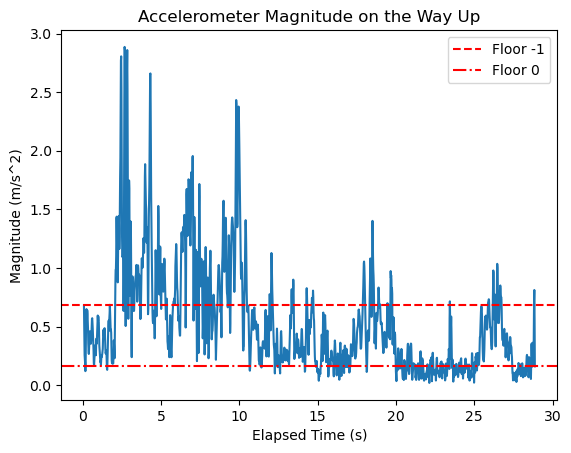

In [126]:
plt.plot(df_up_acc["seconds_elapsed"], df_up_acc["magnitude"])
plt.title("Accelerometer Magnitude on the Way Up")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Magnitude (m/s^2)")
plt.axhline(y=df_up_acc["magnitude"].iloc[0], color='red', linestyle='--', label = "Floor -1")
plt.axhline(y=df_up_acc["magnitude"].iloc[-1], color='red', linestyle='-.', label = "Floor 0")
plt.legend()
plt.savefig(r"Hoch-2025-04-17_13-33-51\plots\up_acc.png")


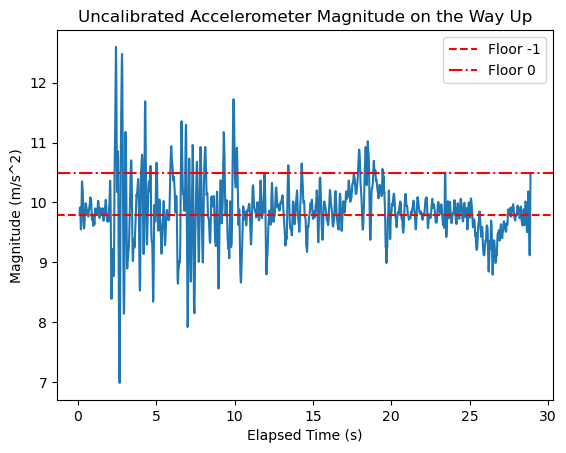

In [127]:
plt.plot(df_up_acc_uncal["seconds_elapsed"], df_up_acc_uncal["magnitude"])
plt.title("Uncalibrated Accelerometer Magnitude on the Way Up")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Magnitude (m/s^2)")
plt.axhline(y=df_up_acc_uncal["magnitude"].iloc[0], color='red', linestyle='--', label = "Floor -1")
plt.axhline(y=df_up_acc_uncal["magnitude"].iloc[-1], color='red', linestyle='-.', label = "Floor 0")
plt.legend()
plt.savefig(r"Hoch-2025-04-17_13-33-51\plots\up_acc_uncalibrated.png")


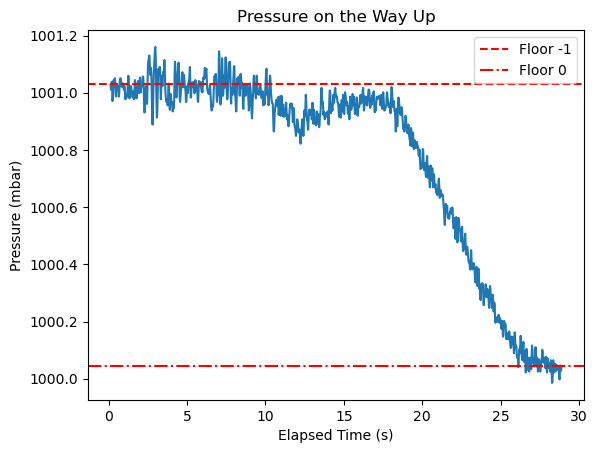

In [130]:
plt.plot(df_up_bar["seconds_elapsed"], df_up_bar["pressure"])
plt.title("Pressure on the Way Up")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Pressure (mbar)")
plt.axhline(y=df_up_bar["pressure"].iloc[0], color='red', linestyle='--', label = "Floor -1")
plt.axhline(y=df_up_bar["pressure"].iloc[-1], color='red', linestyle='-.', label = "Floor 0")
plt.legend()

plt.savefig(r"Hoch-2025-04-17_13-33-51\plots\up_pressure.png")


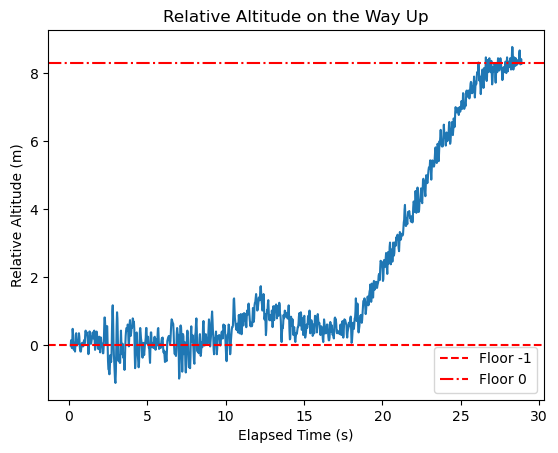

In [131]:
plt.plot(df_up_bar["seconds_elapsed"], df_up_bar["relativeAltitude"])
plt.title("Relative Altitude on the Way Up")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Relative Altitude (m)")
plt.axhline(y=df_up_bar["relativeAltitude"].iloc[0], color='red', linestyle='--', label = "Floor -1")
plt.axhline(y=df_up_bar["relativeAltitude"].iloc[-1], color='red', linestyle='-.', label = "Floor 0")
plt.legend()

plt.savefig(r"Hoch-2025-04-17_13-33-51\plots\up_relativeAltitude.png")


In [ ]:
filtered_df = df_long_acc[abs(df_long_acc["seconds_elapsed"] - floor_minus_one["seconds_elapsed"]) <= tolerance]

acc_magnitude_at_floor_minus_one = filtered_df["magnitude"].values[0]

In [63]:
df_up_bar["pressure"].iloc[0]

1001.0289916992188

In [64]:
df_up_bar["pressure"].iloc[-1]

1000.0433959960938

In [69]:
df_up_bar["relativeAltitude"].iloc[0]

0.0

In [70]:
df_up_bar["relativeAltitude"].iloc[-1]

8.291458129882812

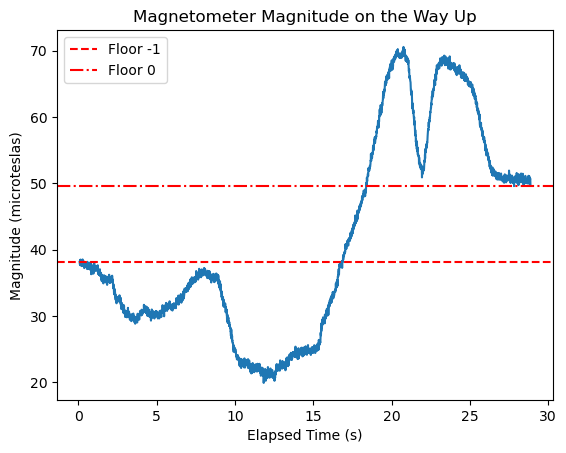

In [132]:
plt.plot(df_up_mag["seconds_elapsed"], df_up_mag["magnitude"])
plt.title("Magnetometer Magnitude on the Way Up")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Magnitude (microteslas)")
plt.axhline(y=df_up_mag["magnitude"].iloc[0], color='red', linestyle='--', label = "Floor -1")
plt.axhline(y=df_up_mag["magnitude"].iloc[-1], color='red', linestyle='-.', label = "Floor 0")
plt.legend()

plt.savefig(r"Hoch-2025-04-17_13-33-51\plots\up_mag.png")


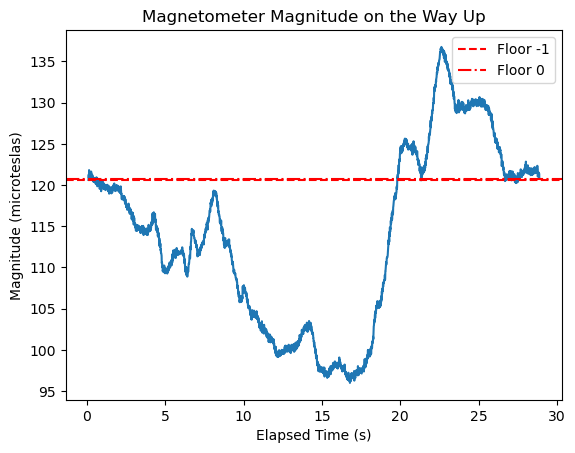

In [133]:
plt.plot(df_up_mag_uncal["seconds_elapsed"], df_up_mag_uncal["magnitude"])
plt.title("Magnetometer Magnitude on the Way Up")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Magnitude (microteslas)")
plt.axhline(y=df_up_mag_uncal["magnitude"].iloc[0], color='red', linestyle='--', label = "Floor -1")
plt.axhline(y=df_up_mag_uncal["magnitude"].iloc[-1], color='red', linestyle='-.', label = "Floor 0")
plt.legend()

plt.savefig(r"Hoch-2025-04-17_13-33-51\plots\up_mag_uncalibrated.png")


# Traveling from 1 to -3

The elevator is located on Hauptstraße 141-144.

In [51]:
df_long_acc = pd.read_csv(r"1st_floor_to_-3-2025-04-17_09-57-09\Accelerometer.csv")
df_long_acc_uncal = pd.read_csv(r"1st_floor_to_-3-2025-04-17_09-57-09\AccelerometerUncalibrated.csv")

df_long_bar = pd.read_csv(r"1st_floor_to_-3-2025-04-17_09-57-09\Barometer.csv")

df_long_mag = pd.read_csv(r"1st_floor_to_-3-2025-04-17_09-57-09\Magnetometer.csv")
df_long_mag_uncal = pd.read_csv(r"1st_floor_to_-3-2025-04-17_09-57-09\MagnetometerUncalibrated.csv")

In [52]:
df_long_bar.head()

,time,seconds_elapsed,relativeAltitude,pressure
0,1744883829222454500,0.107455,0.000000,1000.443054
1,1744883829247505400,0.132505,0.412193,1000.394226
2,1744883829272554500,0.157554,0.821747,1000.345398
3,1744883829297603800,0.182604,0.924797,1000.333191
4,1744883829322653400,0.207653,0.924797,1000.333191


In [53]:
df_long_acc = add_magnitude(df_long_acc)
df_long_acc_uncal = add_magnitude(df_long_acc_uncal)
df_long_mag = add_magnitude(df_long_mag)
df_long_mag_uncal = add_magnitude(df_long_mag_uncal)

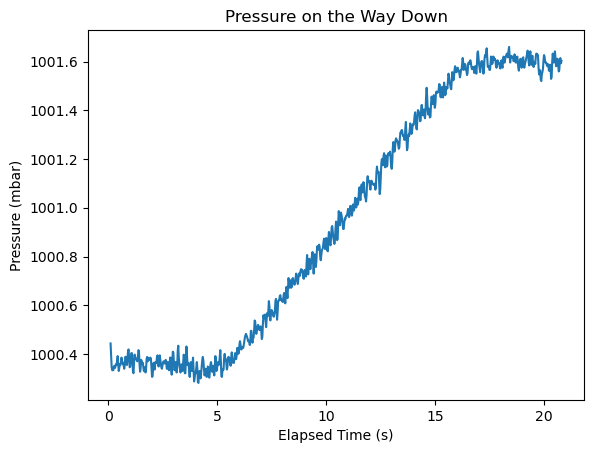

In [134]:
plt.plot(df_long_bar["seconds_elapsed"], df_long_bar["pressure"])
plt.title("Pressure on the Way Down")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Pressure (mbar)")

plt.savefig(r"1st_floor_to_-3-2025-04-17_09-57-09\plots\long_pressure.png")


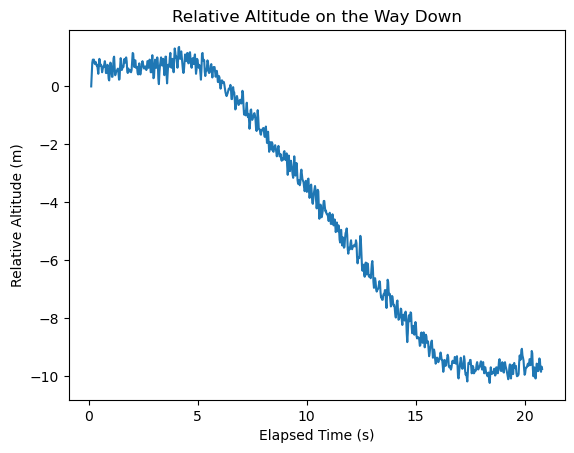

In [135]:
plt.plot(df_long_bar["seconds_elapsed"], df_long_bar["relativeAltitude"])
plt.title("Relative Altitude on the Way Down")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Relative Altitude (m)")

plt.savefig(r"1st_floor_to_-3-2025-04-17_09-57-09\plots\long_relAlt.png")


In [75]:
df_long_bar["relativeAltitude"].iloc[0]

0.0

In [76]:
df_long_bar["relativeAltitude"].iloc[-1]

-9.747344970703123

This means during the 4 floor ride, the elevator went down about 9.7 meters. This means a floor could be about 2.4 meters high. So floor 1 is at 0, 0 is at about -2.4 and -1 is at about -4.8 meters. -2 is at about -7.2 meters and -3 is at about -9.6 meters.

In [85]:
floor_zero = df_long_bar[df_long_bar["relativeAltitude"] < -2.4].iloc[0]

In [104]:
floor_zero

time                1.744884e+18
seconds_elapsed     8.623548e+00
relativeAltitude   -2.412392e+00
pressure            1.000730e+03
Name: 340, dtype: float64

In [80]:
floor_minus_one = df_long_bar[df_long_bar["relativeAltitude"] < -4.8].iloc[0]

In [81]:
floor_minus_two = df_long_bar[df_long_bar["relativeAltitude"] < -7.2].iloc[0]

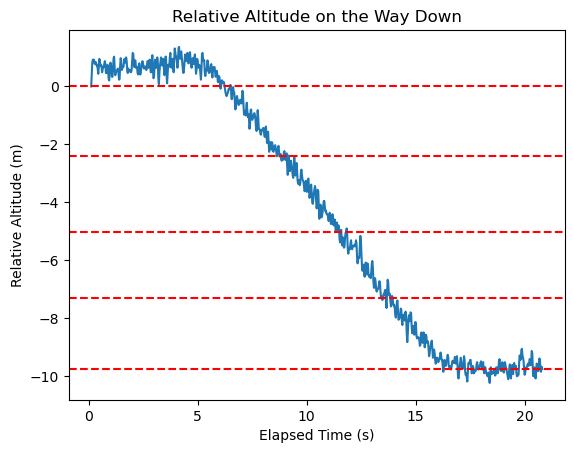

In [136]:
plt.plot(df_long_bar["seconds_elapsed"], df_long_bar["relativeAltitude"])
plt.title("Relative Altitude on the Way Down")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Relative Altitude (m)")
plt.axhline(y=df_long_bar["relativeAltitude"].iloc[0], color='red', linestyle='--', label = "Floor 11")
plt.axhline(y=floor_zero["relativeAltitude"], color='red', linestyle='--', label = "Floor 0")
plt.axhline(y=floor_minus_one["relativeAltitude"], color='red', linestyle='--', label = "Floor -1")
plt.axhline(y=floor_minus_two["relativeAltitude"], color='red', linestyle='--', label = "Floor -2")
plt.axhline(y=df_long_bar["relativeAltitude"].iloc[-1], color='red', linestyle='--', label = "Floor -3")

plt.savefig(r"1st_floor_to_-3-2025-04-17_09-57-09\plots\long_pressure_with_floors.png")


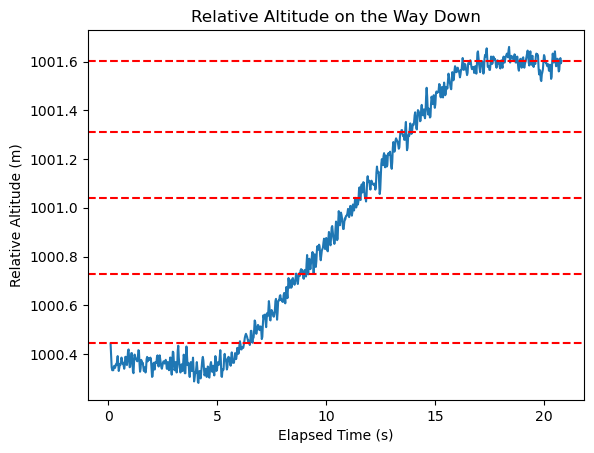

In [137]:
plt.plot(df_long_bar["seconds_elapsed"], df_long_bar["pressure"])
plt.title("Relative Altitude on the Way Down")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Relative Altitude (m)")
plt.axhline(y=df_long_bar["pressure"].iloc[0], color='red', linestyle='--', label = "Floor 11")
plt.axhline(y=floor_zero["pressure"], color='red', linestyle='--', label = "Floor 0")
plt.axhline(y=floor_minus_one["pressure"], color='red', linestyle='--', label = "Floor -1")
plt.axhline(y=floor_minus_two["pressure"], color='red', linestyle='--', label = "Floor -2")
plt.axhline(y=df_long_bar["pressure"].iloc[-1], color='red', linestyle='--', label = "Floor -3")

plt.savefig(r"1st_floor_to_-3-2025-04-17_09-57-09\plots\long_relAlt_with_floors.png")


In [108]:
len(df_long_bar)

827

In [109]:
len(df_long_acc)

1236

In [105]:
df_long_acc

,time,seconds_elapsed,z,y,x,magnitude
0,1744883829155645000,0.040645,0.087190,0.036221,0.074787,0.120446
1,1744883829172449800,0.057450,0.044841,-0.000185,-0.002448,0.044908
2,1744883829189265200,0.074265,-0.038062,0.004632,-0.013706,0.040719
3,1744883829206080500,0.091081,-0.141509,0.036865,-0.007399,0.146419
4,1744883829222889000,0.107889,-0.188743,0.049037,0.015204,0.195600
...,...,...,...,...,...,...
1231,1744883849850003200,20.735003,-0.372543,0.179210,0.014180,0.413649
1232,1744883849866813700,20.751814,-0.267823,0.081089,0.000406,0.279830
1233,1744883849883625200,20.768625,-0.210032,0.042860,-0.034543,0.217125
1234,1744883849900435700,20.785436,-0.123697,0.074051,-0.060427,0.156320


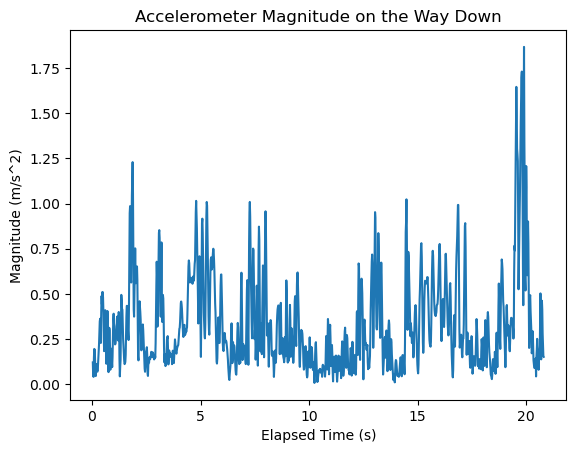

In [138]:
plt.plot(df_long_acc["seconds_elapsed"], df_long_acc["magnitude"])
plt.title("Accelerometer Magnitude on the Way Down")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Magnitude (m/s^2)")

plt.savefig(r"1st_floor_to_-3-2025-04-17_09-57-09\plots\long_acc.png")


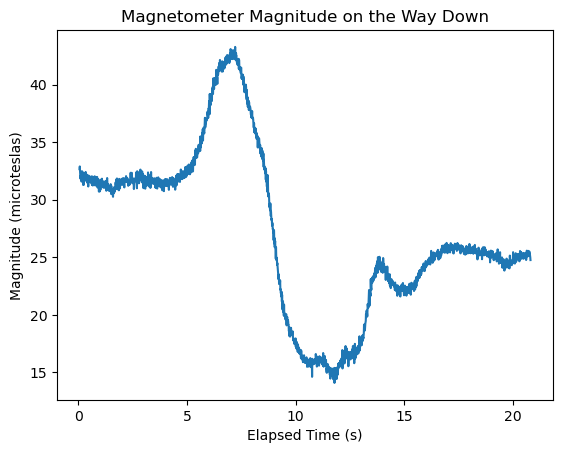

In [139]:
plt.plot(df_long_mag["seconds_elapsed"], df_long_mag["magnitude"])
plt.title("Magnetometer Magnitude on the Way Down")
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Magnitude (microteslas)")

plt.savefig(r"1st_floor_to_-3-2025-04-17_09-57-09\plots\long_mag.png")
